In [11]:
import numpy as np


In [12]:
def flipBit(s, prob):
    assert s in ["0", "1"]
    assert prob in [0,1]
    if prob==1:
        return '1' if s=='0' else '0'
    return s

def applyIndividualBounds(x, lower = -1, upper = 1):
    #x (float)
    x = max(x,lower)
    x = min(x, upper)
    return x

def applyBounds(x):
    new = []
    for i in range(len(x)):
        new.append(applyIndividualBounds(x[i]))
    return new

def float2binary(parent, nvar, ndec=2, chromosome_size=11):
    """
    Converts each of the nvar values of the parent to binary of size "chromosome_size" and concatenates them
    to 1 string
    Args:
        parent (list) - list of nvar floating values
        nvar (int) - no. of variables, the size of parent
        ndec (int) - max no. of decimal points of each values in parent
        chromosome_size (int) - no. of bits to which each value in parent is converted
    Return:
        parent_bin (str) - binary no. string made by concatenating each value's binary equivalent
    """
    parent_bin = ""
    for i in range(nvar):
        val = int(parent[i]*10**ndec) #converting from float to int, later will be converted back
        if val<0:
            val=-1*val
        binary = bin(val)[2:]
        binary = "0"*(chromosome_size-len(binary)) + binary
        parent_bin = parent_bin + binary
    return parent_bin
def binary2float(child, nvar, ndec=2, chromosome_size=11):
    """
    Converts the child string to nvar float values by reversin the effect of float2binary
    Args:
        child (str) - binary no. string made by concatenating each value's binary equivalent,
                     size - nvar*chromosome_size
        nvar (int) - no. of variables whose binary are concatenated in child
        ndec (int) - max no. of decimal points of each values 
        chromosome_size (int) - no. of bits of each value in child
    Return:
        child (list) - list of nvar floating values
    """
    child_float = []
    
    for i in range(nvar):
        val = child[i*chromosome_size:(i+1)*chromosome_size]
        val = int(val, 2)/10**ndec    #converting to float, reversing the effect of binary conversion
        child_float.append(val)
        
    return child_float

def tournament_selection(npop, cost, population):
    """
    Selects a parent for mating besed on touranment selection
    Args:
        npop (int)- population size
        rank (dict) - a dictionary containing the ranks of each member from current population
    """
    parent1 = np.random.randint(0, npop)
    parent2 = np.random.randint(0, npop)
    
    p1 = population[parent1]
    p2 = population[parent2]
    return (parent1 if cost(p1)<cost(2) else parent2)

def crossover(parent1, parent2, nvar=2, ndec=2, prob = 0.95, chromosome_size = 11):
    """
    Perfroms two point genetic crossover and returns the new children
    NOTE - Does not apply bouds to new child here!
    
    Args:
        parent1, parent2 (list) - parents each containing nvar values
        ndec (int) - max no. of decimal points in values contained in parents
        prob (float) - the probabilty for doing crossover
        chromosome_size (int)- the size of the binary equivalent of largest no. in var_size 
    Return:
        child1, child2 (list)
    """
    parent1_ = float2binary(parent1, nvar, ndec, chromosome_size)
    parent2_ = float2binary(parent2, nvar, ndec, chromosome_size)
    
    crossover_point1 = np.random.randint(2,chromosome_size*nvar//2)
    crossover_point2 = np.random.randint(1+chromosome_size*nvar//2, chromosome_size*nvar-1)
    if np.random.rand()<=prob:
        child1 = parent1_[:crossover_point1] + parent2_[crossover_point1:crossover_point2] + parent1_[crossover_point2:]
        child2 = parent2_[:crossover_point1] + parent1_[crossover_point1:crossover_point2] + parent2_[crossover_point2:]
        
        child1 = binary2float(child1, nvar, ndec, chromosome_size)
        child2 = binary2float(child2, nvar, ndec, chromosome_size)
        return child1, child2
    return parent1, parent2

def mutation(child, nvar = 2, ndec = 2, chromosome_size = 11, mutRate = 0.005):
    """
    Performs mutation on the child by converting it to binary and flipping each bit on prob = mutRate
    NOTE - Does not do applyBounds
    """
    childBin = float2binary(child, nvar, ndec, chromosome_size)
    flip = np.int32(np.random.randn(chromosome_size*nvar)<=mutRate)
    mutChild = ''
    
    for i in range(chromosome_size*nvar):
        mutChild = mutChild + flipBit(childBin[i], flip[i])
    mutChild = binary2float(mutChild, nvar, ndec, chromosome_size)*np.random.choice(-1,1)
    return mutChild

In [3]:
def Optimizer(evalcost, paramInitialiser, param2list, npop = 10, niter = 200,
              crossoverProb = 0.95, mutationRate = 0.5, nvar = 2):
    """
    Genetic algorithm optimiser
    cost - cost function as a function of params (list)
    params - list
    pramInitialiser - function
    param2list - function
    """
    population = []
    params = None
    #initialize_params
    for i in range(npop):
        params = paramInitialiser()
        params = param2list(params)
        population.append(params)
    nvar = len(params)
    
    for i in range(niter):        
        for j in range(npop//2):
            #selection
            p1 = tournament_selection(npop, evalcost, population)
            p2 = tournament_selection(npop, evalcost, population)
            #crossover & mutaion
            c1, c2 = crossover(population[p1], population[p2],prob=crossoverProb, nvar = )
            c1, c2 = mutation(c1, mutRate= mutationRate), mutation(c2, mutRate=mutationRate)
            #applying bounds
            c1, c2 = applyBounds(c1), applyBounds(c2)
            #adding childrent to the population
            population.append(c1)
            population.append(c2)
        population = sorted(population, key=lambda x:evalcost(x))
        population = population[:npop]
    return population[0]

SyntaxError: invalid syntax (<ipython-input-3-5602ba847c5b>, line 25)

In [ ]:
a = [1.6,2.6,3.4,1,2]
a_ = float2binary(a, nvar=4)
a, a_

In [ ]:
mutation(a, nvar = 4)

In [4]:
float2binary([5.63,2.32,1.23], nvar=3)

'010001100110001110011100001111011'

In [7]:
binary2float('010001100110001110011100001111011', nvar=3)

[5.63, 2.31, 1.23]

In [9]:
np.mean(np.ones((5,3)), axis=0)

array([1., 1., 1.])

/home/shivji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


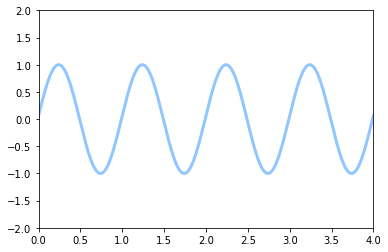

In [31]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')


[1, 2, 3, 1, 2, 3]

In [23]:
len(bin(2000))

13